Largura em pixels: 640
Altura em pixels: 480
Qtde de canais: 3
imagem original


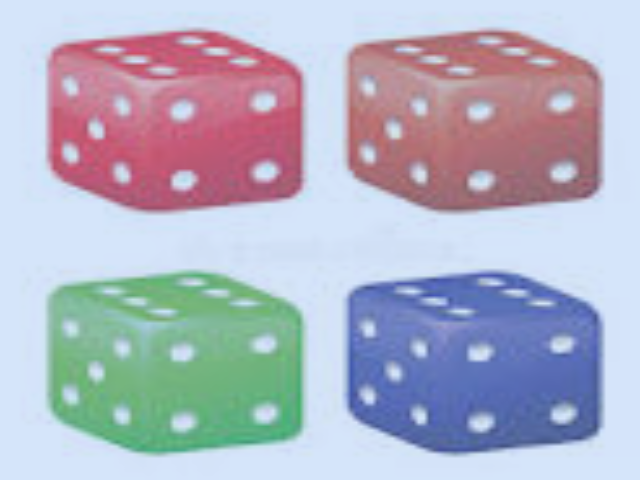

imagem em cinza


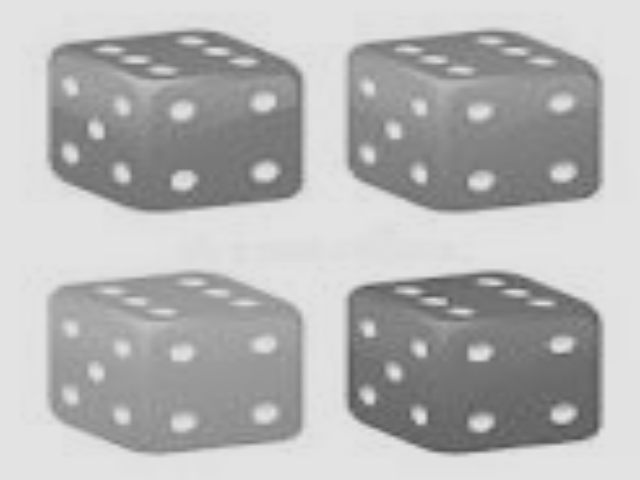

blur


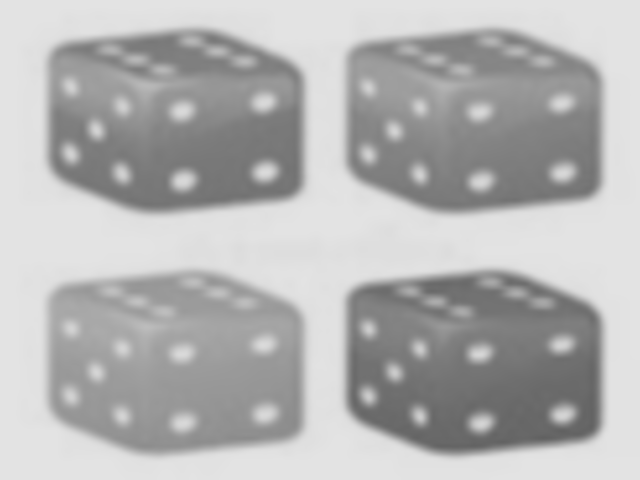

binarização


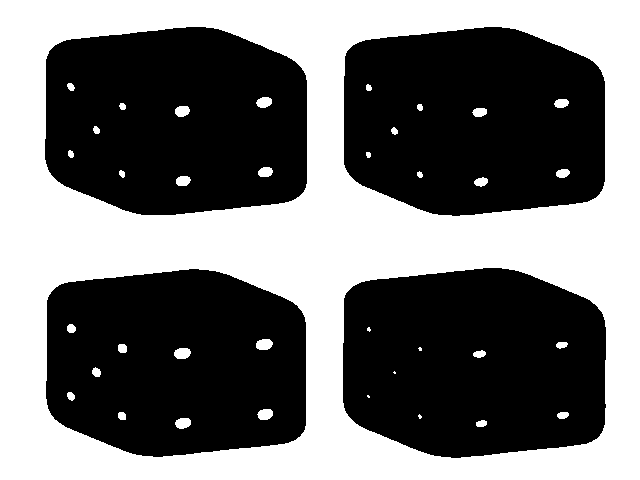

detector de bordas


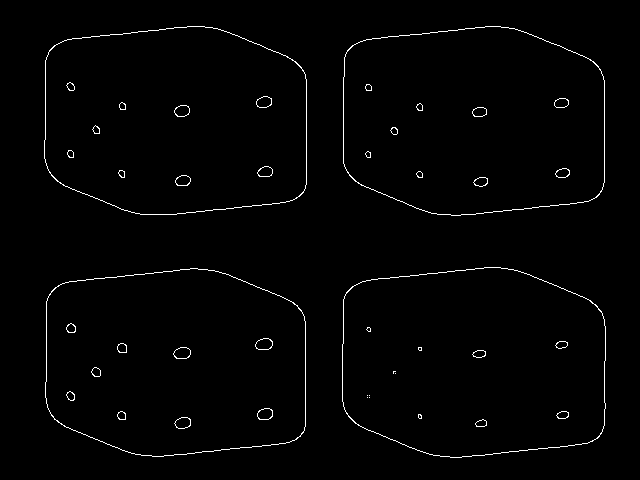

detector de contornos


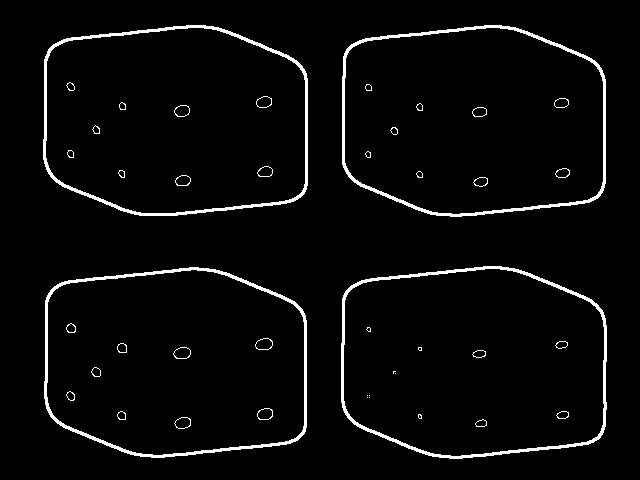

Quantidade de objetos: 4


In [31]:
# -*- coding: utf-8 -*-

# Aula 06 - Processamento de imagens
# Prof. Alexsandro C. Bonatto

# Importação das bibliotecas
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

import urllib

# le imagem da web

urlImagem = 'https://www.negritando.com/ifrs/pos-pds/dados1.png'
urlImagemReq = urllib.request.urlopen(urlImagem)
urlImagemArray = arr = np.asarray(bytearray(urlImagemReq.read()), dtype=np.uint8)
urlImagemImg = cv2.imdecode(urlImagemArray, cv2.IMREAD_COLOR) # 'Load it as it is'

#print('cv2.IMREAD_COLOR', cv2.IMREAD_COLOR)
#cv2_imshow(urlImagemImg)

# segue o fonte original


# Leitura da imagem com a função imread()
imagemOriginal = urlImagemImg # cv2.imread('imagem.jpg')
imagem = cv2.resize(imagemOriginal, (640,480))

print('Largura em pixels: ', end='')
print(imagem.shape[1]) #largura da imagem
print('Altura em pixels: ', end='')
print(imagem.shape[0]) #altura da imagem
print('Qtde de canais: ', end='')
print(imagem.shape[2])

recorte = imagem[100:200, 100:200]

# Mostra a imagem com a função imshow
print('imagem original')
cv2_imshow(imagem)

# 1 convertendo para tom de cinza
print ('imagem em cinza')
imagemGray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
cv2_imshow(imagemGray)

# 2. blur
print('blur')
#imagemSuave = cv2.GaussianBlur(imagemGray, ( 11, 11), 0) #  kernel Gaussiano
imagemSuave = cv2.blur(imagemGray, ( 11, 11)) #  kernel Gaussiano
cv2_imshow(imagemSuave)

# 3. binarização
print('binarização')

#(T, bin) = cv2.threshold(imagemSuave,200, 255, cv2.THRESH_BINARY)
#imagemSuaveBin = np.vstack([
#  np.hstack([imagemSuave, bin])
#  ])

(T, imagemSuaveBin) = cv2.threshold(imagemSuave,200, 255, cv2.THRESH_BINARY)


cv2_imshow(imagemSuaveBin)

# 4. detector de bordas
print('detector de bordas')
imagemCanny = cv2.Canny(imagemSuaveBin, 20, 120)
cv2_imshow(imagemCanny)

# 5. detector de contornos
print('detector de contornos')
objetos = cv2.findContours(imagemCanny, cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
objetos = objetos[0] if len(objetos) == 2 else objetos[1]
imgC2 = imagemCanny.copy() # imgColorida
#cv2_imshow(imagemCanny) # imgColorida
cv2.drawContours(imgC2, objetos, -1, (255, 0, 0), 2)
cv2_imshow(imgC2)
cv2.waitKey(0)
print("Quantidade de objetos: "+str(len(objetos)))

